In [1]:
from IPython.display import YouTubeVideo

# 1. Introduction

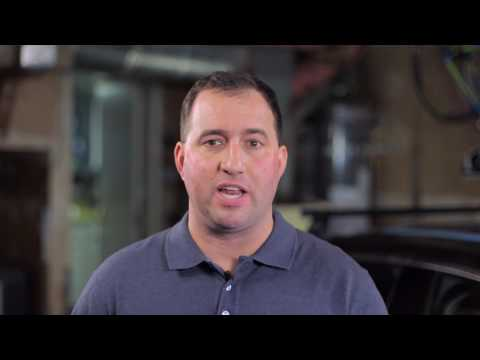

In [2]:
YouTubeVideo('-DZ5OI2uCzU', width=720, height=400)

# 2. Deep Learning Frameworks

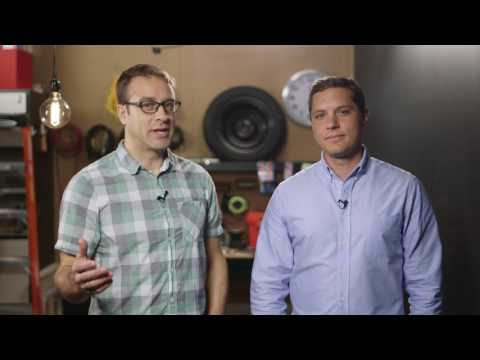

In [3]:
YouTubeVideo('i2mmnu-t8-c', width=720, height=400)

# 3. High Level Frameworks

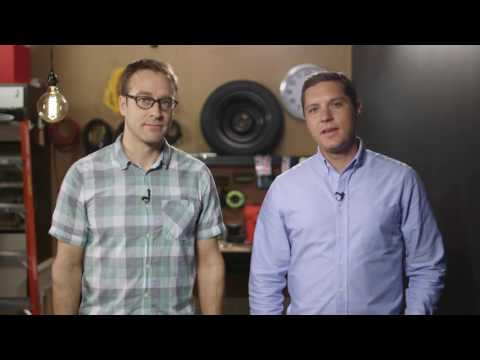

In [4]:
YouTubeVideo('ThmsQxazSvM', width=720, height=400)

# 4. Keras Overview

<img src="img/sign.jpg" width=600>

[Keras](https://faroit.github.io/keras-docs/1.2.2/) makes coding deep neural networks simpler. To demonstrate just how easy it is, you're going to build a simple fully-connected network in a few dozen lines of code.

We’ll be connecting the concepts that you’ve learned in the previous lessons to the methods that Keras provides.

The network you will build is similar to Keras’s [sample network](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py) that builds out a convolutional neural network for [MNIST](http://yann.lecun.com/exdb/mnist/). However for the network you will build you're going to use a small subset of the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news) dataset that you've used previously.

The general idea for this example is that you'll first load the data, then define the network, and then finally train the network.

# 5. Neural Networks in Keras

Here are some core concepts you need to know for working with Keras.

## Sequential Model

```python
from keras.models import Sequential

#Create the Sequential model
model = Sequential()
```

The [keras.models.Sequential](https://keras.io/models/sequential/) class is a wrapper for the neural network model. It provides common functions like fit(), evaluate(), and compile(). We'll cover these functions as we get to them. Let's start looking at the layers of the model.

## Layers
A Keras layer is just like a neural network layer. There are fully connected layers, max pool layers, and activation layers. You can add a layer to the model using the model's add() function. For example, a simple model would look like this:

```python
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

#Create the Sequential model
model = Sequential()

#1st Layer - Add a flatten layer
model.add(Flatten(input_shape=(32, 32, 3)))

#2nd Layer - Add a fully connected layer
model.add(Dense(100))

#3rd Layer - Add a ReLU activation layer
model.add(Activation('relu'))

#4th Layer - Add a fully connected layer
model.add(Dense(60))

#5th Layer - Add a ReLU activation layer
model.add(Activation('relu'))
```

Keras will automatically infer the shape of all layers after the first layer. This means you only have to set the input dimensions for the first layer.

The first layer from above, model.add(Flatten(input_shape=(32, 32, 3))), sets the input dimension to (32, 32, 3) and output dimension to (3072=32 x 32 x 3). The second layer takes in the output of the first layer and sets the output dimensions to (100). This chain of passing output to the next layer continues until the last layer, which is the output of the model.

## Quiz
In this quiz you will build a multi-layer feedforward neural network to classify traffic sign images using Keras.

1. Set the first layer to a Flatten() layer with the input_shape set to (32, 32, 3).
2. Set the second layer to a Dense() layer with an output width of 128.
3. Use a ReLU activation function after the second layer.
4. Set the output layer width to 5, because for this data set there are only 5 classes.
5. Use a softmax activation function after the output layer.
6. Train the model for 3 epochs. You should be able to get over 50% training accuracy.

To get started, review the Keras documentation about models and layers. The Keras example of a [Multi-Layer Perceptron](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) network is similar to what you need to do here. Use that as a guide, but keep in mind that there are a number of differences.

## Data Download
The data set used in these quizzes can be downloaded [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/March/58dbf6d5_small-traffic-set/small-traffic-set.zip).


In [16]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
#tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

# Build the Fully Connected Neural Network in Keras Here
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Another solution that is correct, but not recognized by the grader
# model.add(Flatten(input_shape=(32, 32, 3)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(5, activation='softmax'))

# preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, epochs=3, validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/3
80/80 [==============================] - 0s - loss: 1.1424 - acc: 0.5000 - val_loss: 0.6246 - val_acc: 0.8000
Epoch 2/3
80/80 [==============================] - 0s - loss: 0.6758 - acc: 0.7250 - val_loss: 0.5536 - val_acc: 0.8500
Epoch 3/3
80/80 [==============================] - 0s - loss: 0.6016 - acc: 0.7250 - val_loss: 0.4153 - val_acc: 0.8500


# 6. Convolutions in Keras

## Convolutions

1. Build from the previous network.
2. Add a [convolutional layer](https://keras.io/layers/convolutional/#convolution2d) with 32 filters, a 3x3 kernel, and valid padding before the flatten layer.
3. Add a ReLU activation after the convolutional layer.
4. Train for 3 epochs again, should be able to get over 50% accuracy.

Hint: The Keras example of a [convolutional neural network](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py) for MNIST would be a good example to review.

In [15]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
#tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D

# Build Convolutional Neural Network in Keras Here
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, epochs=3, validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/3
80/80 [==============================] - 0s - loss: 1.4051 - acc: 0.3125 - val_loss: 2.1766 - val_acc: 0.6500
Epoch 2/3
80/80 [==============================] - 0s - loss: 1.9239 - acc: 0.6750 - val_loss: 0.5796 - val_acc: 0.7000
Epoch 3/3
80/80 [==============================] - 0s - loss: 0.8618 - acc: 0.5750 - val_loss: 0.3758 - val_acc: 0.7500


# 7. Pooling in Keras

## Pooling

1. Build from the previous network
2. Add a 2x2 [max pooling layer](https://keras.io/layers/pooling/#maxpooling2d) immediately following your convolutional layer.
3. Train for 3 epochs again. You should be able to get over 50% training accuracy.

In [18]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
#tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# Build Convolutional Neural Network in Keras Here
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, epochs=3, validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/3
80/80 [==============================] - 0s - loss: 1.3315 - acc: 0.4125 - val_loss: 0.7076 - val_acc: 0.7000
Epoch 2/3
80/80 [==============================] - 0s - loss: 0.7782 - acc: 0.6125 - val_loss: 0.5077 - val_acc: 0.8500
Epoch 3/3
80/80 [==============================] - 0s - loss: 0.5668 - acc: 0.7375 - val_loss: 0.3527 - val_acc: 0.8500


# 8. Dropout in Keras

## Dropout
1. Build from the previous network.
2. Add a [dropout](https://keras.io/layers/core/#dropout) layer after the pooling layer. Set the dropout rate to 50%.

In [20]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
#tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# Build Convolutional Pooling Neural Network with Dropout in Keras Here
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, epochs=3, validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/3
80/80 [==============================] - 0s - loss: 1.4145 - acc: 0.2375 - val_loss: 0.8381 - val_acc: 0.5000
Epoch 2/3
80/80 [==============================] - 0s - loss: 1.0178 - acc: 0.4500 - val_loss: 0.7278 - val_acc: 0.7000
Epoch 3/3
80/80 [==============================] - 0s - loss: 0.7244 - acc: 0.7500 - val_loss: 0.5195 - val_acc: 0.8500


# 9. Testing in Keras

## Test
Once you've picked out your best model, it's time to test it!

1. Try to get the highest validation accuracy possible. Feel free to use all the previous concepts and train for as many epochs as needed.
2. Select your best model and train it one more time.
3. Use the test data and the [Keras evaluate()](https://keras.io/models/model/#evaluate) method to see how well the model does.

In [21]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
#tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# TODO: Build the Final Test Neural Network in Keras Here
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, epochs=10, validation_split=0.2)

with open('small_test_traffic.p', 'rb') as f:
    data_test = pickle.load(f)

X_test = data_test['features']
y_test = data_test['labels']

# preprocess data
X_normalized_test = np.array(X_test / 255.0 - 0.5 )
y_one_hot_test = label_binarizer.fit_transform(y_test)

print("Testing")

metrics = model.evaluate(X_normalized_test, y_one_hot_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))
    

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 0s - loss: 1.3520 - acc: 0.3375 - val_loss: 0.8237 - val_acc: 0.5500
Epoch 2/10
80/80 [==============================] - 0s - loss: 0.8132 - acc: 0.5875 - val_loss: 0.5400 - val_acc: 0.8500
Epoch 3/10
80/80 [==============================] - 0s - loss: 0.6067 - acc: 0.7750 - val_loss: 0.3858 - val_acc: 0.8500
Epoch 4/10
80/80 [==============================] - 0s - loss: 0.4424 - acc: 0.8250 - val_loss: 0.2642 - val_acc: 0.8500
Epoch 5/10
80/80 [==============================] - 0s - loss: 0.3315 - acc: 0.8875 - val_loss: 0.2041 - val_acc: 0.8500
Epoch 6/10
80/80 [==============================] - 0s - loss: 0.2755 - acc: 0.9125 - val_loss: 0.1598 - val_acc: 1.0000
Epoch 7/10
80/80 [==============================] - 0s - loss: 0.2218 - acc: 0.9500 - val_loss: 0.1318 - val_acc: 1.0000
Epoch 8/10
80/80 [==============================] - 0s - loss: 0.2084 - acc: 0.9000 - val_loss: 0.1399 - val_

# 10. Conclusion